In [1]:
from neural_network_recreate_01 import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train = np.random.rand(100, 2)
X_train = np.r_[X_train, (np.random.rand(30, 2)  - .5) * .3 + .5] - 0.5
Y_train = np.asarray([int(x[0] ** 2 + x[1] ** 2 < 0.2 ** 2) for x in X_train])

X_test = np.random.rand(150, 2) - 0.5
Y_test = np.asarray([int(x[0] ** 2 + x[1] ** 2 < 0.2 ** 2) for x in X_test])

sample = random.sample(range(X_train.shape[0]), X_train.shape[0])
X_train, Y_train = X_train[sample], Y_train[sample]

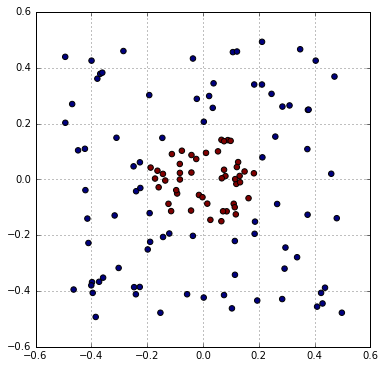

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=30)
plt.grid()

In [4]:
# Y_train = np.array([[0, 1] if i == 1 else [1, 0] for i in Y_train])
Y_train = np.asarray(Y_train).reshape(Y_train.shape[0], 1)

In [5]:
nn = NeuralNetwork(layers=[
    SigmoidLayer(3, bias=False),
    # SoftmaxLayer(2)
    SigmoidLayer(1, bias=False)
], input_bias=False, loss_function='MSE', regular_type='l2', alpha=1e-5)

199 1.27130285099e-18 100


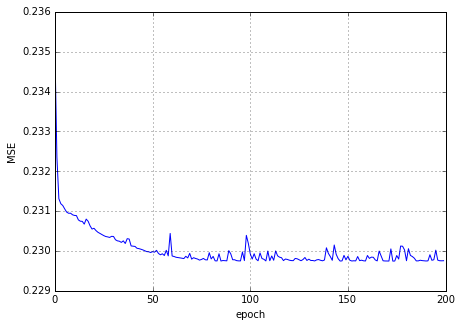

In [12]:
nn.fit(X_train, Y_train, n_epoch=200, batch_size=30, learning_params=(10, 0.65, 100), eps=0)
plt.figure(figsize=(7, 5))
plt.plot(nn.error)
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.grid()

In [13]:
Y_predicted = nn.predict(X_test, batch_size=None)

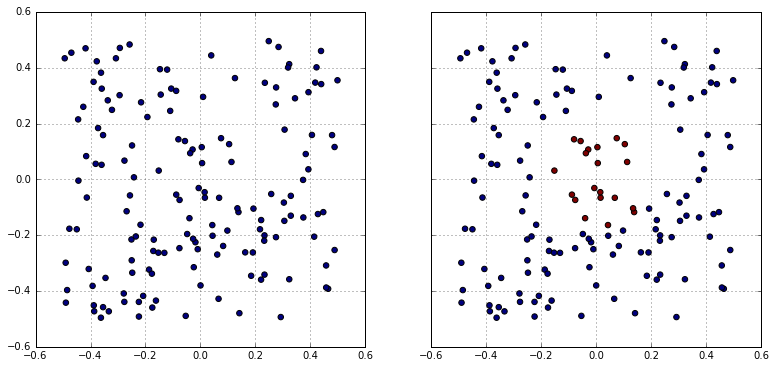

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 6))
# ax1.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted[:,1] > 0.5, s=30)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=Y_predicted > 0.5, s=30)
ax1.grid()
ax2.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=30)
ax2.grid()